In [39]:
import numpy as np
from onset_detection import detected_samples
import matplotlib.pyplot as plt
import helper
import scipy.io.wavfile as wav

from datetime import datetime

/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/GP_models/onset_detection.py:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(path)


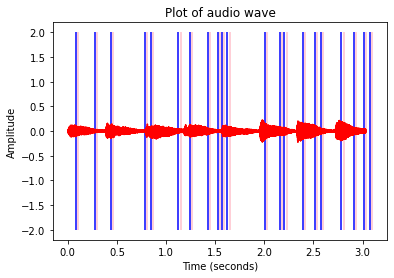

sorted time keys:  [13.5, 15.0, 49.0, 76, 97, 287.89, 9876, 12987.4]
scale frequencies:  [[262], [294], [330], [349], [392], [440], [494], [523]]
8


In [57]:

scale_dict = {13.5: [262], 15.0: [294], 49.0: [330], 76: [349], 97: [392], 287.89: [440], 9876: [494], 12987.4: [523]}  # Made up midi to chords file
sorted_time_keys = sorted(scale_dict.keys(), reverse=False)
scale = [scale_dict[key] for key in sorted_time_keys]
link =     '/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/wav_files/scale.wav'
sample_data, sample_rate, onset_times = detected_samples(
link, sample_length=500, offset=2000, show=True, delta=0.015, num_samples=None)
plt.show()
time_samples = np.linspace(
    0, len(sample_data[0])/sample_rate, len(sample_data[0]))
prob_matrix = np.zeros((len(scale), len(sample_data)))

print('sorted time keys: ', sorted_time_keys)
print('scale frequencies: ' , scale)
print(len(scale))

In [58]:
print(onset_times)

[0.0461678  0.24353741 0.4060771  0.75437642 0.8124263  1.09106576
 1.20716553 1.39292517 1.49741497 1.5322449  1.59029478 1.97342404
 2.12435374 2.17079365 2.35655329 2.48426304 2.54231293 2.75129252
 2.87900227 2.98349206 3.04154195]


In [59]:
def oltw(sample_data, scale, time_samples):
    note_num, audio_num = 0, -1
    path = []
    for sample in sample_data[:-2]:
        min_val = np.inf
        current_notes_prob = helper.stable_nlml(time_samples=time_samples, Y=sample,  f=scale[note_num])
        
        if (note_num != len(scale)-2) and (note_num != len(scale) - 1):
            next_notes_prob = helper.stable_nlml(time_samples=time_samples, Y=sample,  f=scale[note_num+1])
            next_next_notes_prob = helper.stable_nlml(time_samples=time_samples, Y=sample,  f=scale[note_num+2])
        elif note_num ==len(scale)-2:
            next_notes_prob = helper.stable_nlml(time_samples=time_samples, Y=sample,  f=scale[note_num+1])
            next_next_notes_prob = np.inf
        else:
            next_notes_prob = np.inf
            next_next_notes_prob = np.inf
        
        if current_notes_prob < min_val:
            # Hasn't moved on
            min_val = current_notes_prob
            step = (note_num, audio_num+1)
        if next_notes_prob < min_val:
            # Has moved to next note
            min_val = next_notes_prob
            step = (note_num+1, audio_num+1)
        if next_next_notes_prob < min_val:
            # Has moved on to the next next one
            min_val = next_next_notes_prob
            step = (note_num+2, audio_num+1)
        note_num, audio_num = step
        path.append(step)
    return path

path = oltw(sample_data, scale, time_samples)

0it [00:00, ?it/s]

100%|██████████| 15/15 [00:00<00:00, 133.87it/s]
1it [00:00,  8.69it/s]
0it [00:00, ?it/s]

[ 0.03241016  0.02831639  0.02259826  0.01560921  0.00822467  0.00140033
 -0.00408709 -0.00773946 -0.00964383 -0.0101256  -0.00994512 -0.01018859
 -0.01174433 -0.01496389 -0.02005502 -0.02706132 -0.03559817 -0.04492716
 -0.05388939 -0.06160362 -0.0675634  -0.07206767 -0.07604739 -0.08056464
 -0.08643893 -0.0935202  -0.10116055 -0.10787162 -0.11180156 -0.11168248
 -0.10702561 -0.09844768 -0.08753587 -0.07633623 -0.06656214 -0.05935549
 -0.05540476 -0.05459527 -0.0560504  -0.05865426 -0.06086506 -0.06128788
 -0.05907296 -0.05395743 -0.04662071 -0.03813456 -0.02981558 -0.02304781
 -0.01872852 -0.01712529 -0.01798366 -0.02037362 -0.02301412 -0.02453823
 -0.0234815  -0.01898087 -0.01097525 -0.00024014  0.0118698   0.02405387
  0.03515403  0.04460879  0.05246964  0.05885263  0.06439549  0.06963971
  0.07457114  0.07912183  0.08318719  0.0867909   0.08981045  0.09252322
  0.09510643  0.09702983  0.09792492  0.0970616   0.09359154  0.08740401
  0.07899382  0.06966193  0.06113107  0.05488228  0

100%|██████████| 15/15 [00:00<00:00, 156.86it/s]
1it [00:00, 10.18it/s]
100%|██████████| 15/15 [00:00<00:00, 180.02it/s]
1it [00:00, 11.65it/s]
0it [00:00, ?it/s]

[ 0.03241016  0.02831639  0.02259826  0.01560921  0.00822467  0.00140033
 -0.00408709 -0.00773946 -0.00964383 -0.0101256  -0.00994512 -0.01018859
 -0.01174433 -0.01496389 -0.02005502 -0.02706132 -0.03559817 -0.04492716
 -0.05388939 -0.06160362 -0.0675634  -0.07206767 -0.07604739 -0.08056464
 -0.08643893 -0.0935202  -0.10116055 -0.10787162 -0.11180156 -0.11168248
 -0.10702561 -0.09844768 -0.08753587 -0.07633623 -0.06656214 -0.05935549
 -0.05540476 -0.05459527 -0.0560504  -0.05865426 -0.06086506 -0.06128788
 -0.05907296 -0.05395743 -0.04662071 -0.03813456 -0.02981558 -0.02304781
 -0.01872852 -0.01712529 -0.01798366 -0.02037362 -0.02301412 -0.02453823
 -0.0234815  -0.01898087 -0.01097525 -0.00024014  0.0118698   0.02405387
  0.03515403  0.04460879  0.05246964  0.05885263  0.06439549  0.06963971
  0.07457114  0.07912183  0.08318719  0.0867909   0.08981045  0.09252322
  0.09510643  0.09702983  0.09792492  0.0970616   0.09359154  0.08740401
  0.07899382  0.06966193  0.06113107  0.05488228  0

100%|██████████| 15/15 [00:00<00:00, 190.44it/s]
1it [00:00, 12.36it/s]
100%|██████████| 15/15 [00:00<00:00, 185.15it/s]
1it [00:00, 11.95it/s]
0it [00:00, ?it/s]

[-1.36922970e-02 -1.55326324e-02 -1.70050412e-02 -1.80788487e-02
 -1.88169982e-02 -1.91692635e-02 -1.89199019e-02 -1.84536725e-02
 -1.79359820e-02 -1.74782872e-02 -1.73730366e-02 -1.72344279e-02
 -1.72257498e-02 -1.71336699e-02 -1.64393596e-02 -1.50477393e-02
 -1.27393762e-02 -9.41387191e-03 -5.28908987e-03 -8.61998764e-04
  3.62216309e-03  7.68712210e-03  1.10233761e-02  1.33507056e-02
  1.45518100e-02  1.51175931e-02  1.53071294e-02  1.54171931e-02
  1.58061963e-02  1.67938638e-02  1.81967784e-02  1.99774336e-02
  2.18751729e-02  2.33428646e-02  2.42752079e-02  2.45021898e-02
  2.42935792e-02  2.36723870e-02  2.29428988e-02  2.24887859e-02
  2.23005991e-02  2.25531012e-02  2.31515858e-02  2.40360796e-02
  2.51455251e-02  2.63316780e-02  2.73419991e-02  2.80740317e-02
  2.84386706e-02  2.83142589e-02  2.76867673e-02  2.65070219e-02
  2.49051638e-02  2.29831561e-02  2.08782926e-02  1.88049600e-02
  1.67562291e-02  1.47404699e-02  1.27643552e-02  1.08513739e-02
  8.97904485e-03  6.80322

100%|██████████| 15/15 [00:00<00:00, 139.96it/s]
1it [00:00,  9.07it/s]
100%|██████████| 15/15 [00:00<00:00, 154.64it/s]
1it [00:00,  9.83it/s]
0it [00:00, ?it/s]

[-5.57189919e-02 -3.42715532e-02 -2.46554557e-02 -2.55746990e-02
 -3.30299735e-02 -4.38468792e-02 -5.65081574e-02 -6.88173026e-02
 -7.70962089e-02 -7.69171789e-02 -6.62973002e-02 -4.80679795e-02
 -2.82407831e-02 -1.22868232e-02 -2.60066474e-03  1.77193899e-03
  2.80801672e-03  1.53980392e-03 -1.75192067e-03 -6.67194324e-03
 -1.18247587e-02 -1.49590699e-02 -1.43697495e-02 -1.00563718e-02
 -3.53479548e-03  3.50617594e-03  1.03750853e-02  1.73535123e-02
  2.52892021e-02  3.41046043e-02  4.33209464e-02  5.27279601e-02
  6.22218326e-02  7.15670511e-02  7.80959949e-02  7.80256465e-02
  6.89991936e-02  5.20460643e-02  3.26917991e-02  1.80050749e-02
  1.32507225e-02  1.98091846e-02  3.49492505e-02  5.43580353e-02
  7.45536536e-02  9.27723646e-02  1.06937580e-01  1.15609728e-01
  1.17117085e-01  1.10124685e-01  9.43534672e-02  7.17877373e-02
  4.66174521e-02  2.30733082e-02  4.16252529e-03 -9.19311401e-03
 -1.71617717e-02 -1.95321478e-02 -1.56588163e-02 -5.28335897e-03
  1.04845129e-02  2.88266

100%|██████████| 15/15 [00:00<00:00, 161.46it/s]
1it [00:00, 10.46it/s]
100%|██████████| 15/15 [00:00<00:00, 157.24it/s]
1it [00:00, 10.24it/s]
0it [00:00, ?it/s]

[-5.57189919e-02 -3.42715532e-02 -2.46554557e-02 -2.55746990e-02
 -3.30299735e-02 -4.38468792e-02 -5.65081574e-02 -6.88173026e-02
 -7.70962089e-02 -7.69171789e-02 -6.62973002e-02 -4.80679795e-02
 -2.82407831e-02 -1.22868232e-02 -2.60066474e-03  1.77193899e-03
  2.80801672e-03  1.53980392e-03 -1.75192067e-03 -6.67194324e-03
 -1.18247587e-02 -1.49590699e-02 -1.43697495e-02 -1.00563718e-02
 -3.53479548e-03  3.50617594e-03  1.03750853e-02  1.73535123e-02
  2.52892021e-02  3.41046043e-02  4.33209464e-02  5.27279601e-02
  6.22218326e-02  7.15670511e-02  7.80959949e-02  7.80256465e-02
  6.89991936e-02  5.20460643e-02  3.26917991e-02  1.80050749e-02
  1.32507225e-02  1.98091846e-02  3.49492505e-02  5.43580353e-02
  7.45536536e-02  9.27723646e-02  1.06937580e-01  1.15609728e-01
  1.17117085e-01  1.10124685e-01  9.43534672e-02  7.17877373e-02
  4.66174521e-02  2.30733082e-02  4.16252529e-03 -9.19311401e-03
 -1.71617717e-02 -1.95321478e-02 -1.56588163e-02 -5.28335897e-03
  1.04845129e-02  2.88266

100%|██████████| 15/15 [00:00<00:00, 158.45it/s]
1it [00:00, 10.28it/s]
100%|██████████| 15/15 [00:00<00:00, 153.53it/s]
1it [00:00,  9.86it/s]
0it [00:00, ?it/s]

[ 8.92123766e-03  9.75858234e-03  1.02518294e-02  1.02886632e-02
  1.00280903e-02  9.13192891e-03  7.71788880e-03  6.11470686e-03
  4.48252214e-03  3.01543041e-03  1.98265119e-03  1.36650517e-03
  1.09595188e-03  1.18313869e-03  1.38992583e-03  1.70801650e-03
  1.90945948e-03  1.89453480e-03  1.59948308e-03  8.53810634e-04
 -2.70090386e-04 -1.60726323e-03 -2.92421388e-03 -4.05405462e-03
 -4.84598707e-03 -5.37867099e-03 -5.81643404e-03 -6.07022271e-03
 -6.01187302e-03 -5.96113084e-03 -6.17110915e-03 -6.83130603e-03
 -8.13154783e-03 -9.66224167e-03 -1.11475578e-02 -1.24872942e-02
 -1.36919590e-02 -1.46416994e-02 -1.48298321e-02 -1.43074589e-02
 -1.32119330e-02 -1.16814198e-02 -1.00534325e-02 -8.41074344e-03
 -6.97488198e-03 -5.93172759e-03 -5.03240852e-03 -4.26608417e-03
 -3.88155435e-03 -3.33062070e-03 -2.41101068e-03 -1.24978076e-03
  2.48235650e-04  1.54533773e-03  2.61639152e-03  3.61439795e-03
  4.47391672e-03  5.06935827e-03  5.28750662e-03  5.21013932e-03
  4.79111075e-03  4.46982

100%|██████████| 15/15 [00:00<00:00, 155.42it/s]
1it [00:00, 10.07it/s]
100%|██████████| 15/15 [00:00<00:00, 169.19it/s]
1it [00:00, 10.97it/s]
0it [00:00, ?it/s]

[-9.17797070e-03 -1.51298195e-02 -2.03104503e-02 -2.22661290e-02
 -1.83325391e-02 -7.25461217e-03  9.94204544e-03  2.90184971e-02
  4.39464077e-02  5.05007952e-02  4.79012132e-02  3.91362943e-02
  2.87050232e-02  1.93697549e-02  1.21066431e-02  6.90369774e-03
  4.22920659e-03  5.69105847e-03  1.13906730e-02  1.92702282e-02
  2.65801698e-02  3.17503512e-02  3.54343541e-02  3.92736681e-02
  4.42366302e-02  4.96139862e-02  5.44640236e-02  5.88525496e-02
  6.31871372e-02  6.69959784e-02  6.80863634e-02  6.42815381e-02
  5.52672893e-02  4.30379361e-02  3.11577227e-02  2.26996802e-02
  1.91933531e-02  2.03354117e-02  2.46079471e-02  2.99214330e-02
  3.43522318e-02  3.68167162e-02  3.70959230e-02  3.58002707e-02
  3.37203518e-02  3.20439152e-02  3.24258730e-02  3.63993347e-02
  4.45713103e-02  5.64561822e-02  6.98962212e-02  8.14736560e-02
  8.80632252e-02  8.70144740e-02  7.76266083e-02  6.15416802e-02
  4.29143272e-02  2.74888147e-02  1.97015516e-02  2.16767229e-02
  3.23842987e-02  4.84452

100%|██████████| 15/15 [00:00<00:00, 168.03it/s]
1it [00:00, 10.88it/s]
100%|██████████| 15/15 [00:00<00:00, 128.30it/s]
1it [00:00,  8.32it/s]
0it [00:00, ?it/s]

[-9.17797070e-03 -1.51298195e-02 -2.03104503e-02 -2.22661290e-02
 -1.83325391e-02 -7.25461217e-03  9.94204544e-03  2.90184971e-02
  4.39464077e-02  5.05007952e-02  4.79012132e-02  3.91362943e-02
  2.87050232e-02  1.93697549e-02  1.21066431e-02  6.90369774e-03
  4.22920659e-03  5.69105847e-03  1.13906730e-02  1.92702282e-02
  2.65801698e-02  3.17503512e-02  3.54343541e-02  3.92736681e-02
  4.42366302e-02  4.96139862e-02  5.44640236e-02  5.88525496e-02
  6.31871372e-02  6.69959784e-02  6.80863634e-02  6.42815381e-02
  5.52672893e-02  4.30379361e-02  3.11577227e-02  2.26996802e-02
  1.91933531e-02  2.03354117e-02  2.46079471e-02  2.99214330e-02
  3.43522318e-02  3.68167162e-02  3.70959230e-02  3.58002707e-02
  3.37203518e-02  3.20439152e-02  3.24258730e-02  3.63993347e-02
  4.45713103e-02  5.64561822e-02  6.98962212e-02  8.14736560e-02
  8.80632252e-02  8.70144740e-02  7.76266083e-02  6.15416802e-02
  4.29143272e-02  2.74888147e-02  1.97015516e-02  2.16767229e-02
  3.23842987e-02  4.84452

100%|██████████| 15/15 [00:00<00:00, 165.96it/s]
1it [00:00, 10.77it/s]
100%|██████████| 15/15 [00:00<00:00, 175.26it/s]
1it [00:00, 11.36it/s]
0it [00:00, ?it/s]

[-0.02844187 -0.02775591 -0.02683177 -0.02586398 -0.02492994 -0.02387759
 -0.0228423  -0.02176545 -0.02088592 -0.02036436 -0.01994629 -0.01976322
 -0.01950847 -0.01914851 -0.01873175 -0.01804584 -0.0172081  -0.01612586
 -0.0150356  -0.01399196 -0.01317913 -0.01280983 -0.01249292 -0.01198902
 -0.01102808 -0.00951526 -0.00762377 -0.00562256 -0.00368823 -0.00200537
 -0.00081812 -0.00036808 -0.00068353 -0.00149291 -0.00245646 -0.00312624
 -0.00352779 -0.0036213  -0.0034137  -0.00297657 -0.00209573 -0.00084021
  0.00063746  0.00200153  0.00305707  0.00389469  0.00472289  0.0057017
  0.00695756  0.00832403  0.00957255  0.01091852  0.01222323  0.01336033
  0.01429172  0.01483404  0.015078    0.01538101  0.01623834  0.01783898
  0.01971748  0.02141049  0.0227599   0.02345382  0.02385378  0.02447662
  0.02515194  0.02581467  0.02659776  0.02751916  0.02849121  0.02937336
  0.02986017  0.02977665  0.02919167  0.02858307  0.02857709  0.02921646
  0.03025953  0.03158362  0.03280806  0.03361613  0.

100%|██████████| 15/15 [00:00<00:00, 165.19it/s]
1it [00:00, 10.72it/s]
100%|██████████| 15/15 [00:00<00:00, 157.74it/s]
1it [00:00, 10.21it/s]
0it [00:00, ?it/s]

[-0.06864675 -0.05694363 -0.04582806 -0.03644767 -0.02946744 -0.02447256
 -0.02087491 -0.01863185 -0.01771522 -0.01820665 -0.02000189 -0.02256766
 -0.02532783 -0.02795299 -0.03008323 -0.03077704 -0.02894355 -0.02432407
 -0.01730169 -0.00910508 -0.00131767  0.00515024  0.00976569  0.01258738
  0.01442288  0.01678458  0.02114469  0.02797457  0.03714638  0.04794524
  0.05918763  0.06968413  0.07812917  0.08399054  0.08724976  0.08843035
  0.08861805  0.08814541  0.08696887  0.08486968  0.08205737  0.07909853
  0.07693186  0.07635579  0.07768349  0.08163638  0.08845816  0.0974158
  0.10664929  0.11394203  0.11714911  0.11518887  0.10808202  0.09663972
  0.083234    0.07077995  0.06228725  0.05976045  0.0640394   0.07410863
  0.0873369   0.10107889  0.11246294  0.11935713  0.12082006  0.1171786
  0.10945121  0.09896856  0.08721411  0.07513214  0.06321845  0.05164485
  0.04068037  0.03078233  0.02221903  0.0148555   0.00843115  0.00255467
 -0.00340505 -0.0101218  -0.01781543 -0.02626636 -0.0

100%|██████████| 15/15 [00:00<00:00, 154.82it/s]
1it [00:00, 10.07it/s]
100%|██████████| 15/15 [00:00<00:00, 171.18it/s]
1it [00:00, 11.09it/s]
0it [00:00, ?it/s]

[-0.06864675 -0.05694363 -0.04582806 -0.03644767 -0.02946744 -0.02447256
 -0.02087491 -0.01863185 -0.01771522 -0.01820665 -0.02000189 -0.02256766
 -0.02532783 -0.02795299 -0.03008323 -0.03077704 -0.02894355 -0.02432407
 -0.01730169 -0.00910508 -0.00131767  0.00515024  0.00976569  0.01258738
  0.01442288  0.01678458  0.02114469  0.02797457  0.03714638  0.04794524
  0.05918763  0.06968413  0.07812917  0.08399054  0.08724976  0.08843035
  0.08861805  0.08814541  0.08696887  0.08486968  0.08205737  0.07909853
  0.07693186  0.07635579  0.07768349  0.08163638  0.08845816  0.0974158
  0.10664929  0.11394203  0.11714911  0.11518887  0.10808202  0.09663972
  0.083234    0.07077995  0.06228725  0.05976045  0.0640394   0.07410863
  0.0873369   0.10107889  0.11246294  0.11935713  0.12082006  0.1171786
  0.10945121  0.09896856  0.08721411  0.07513214  0.06321845  0.05164485
  0.04068037  0.03078233  0.02221903  0.0148555   0.00843115  0.00255467
 -0.00340505 -0.0101218  -0.01781543 -0.02626636 -0.0

100%|██████████| 15/15 [00:00<00:00, 178.06it/s]
1it [00:00, 11.56it/s]
100%|██████████| 15/15 [00:00<00:00, 179.61it/s]
1it [00:00, 11.61it/s]
0it [00:00, ?it/s]

[-0.04013043 -0.04441967 -0.04760586 -0.04904941 -0.04871776 -0.04683804
 -0.04420288 -0.04187563 -0.04042662 -0.04028737 -0.04174939 -0.04438055
 -0.04757596 -0.05043436 -0.05186839 -0.05157183 -0.04935492 -0.04520096
 -0.03946483 -0.03287963 -0.02595286 -0.01911242 -0.01316702 -0.00852442
 -0.00561363 -0.00472915 -0.0057092  -0.00831167 -0.01208832 -0.01639868
 -0.02060019 -0.02390659 -0.02570355 -0.02561791 -0.02359524 -0.02009451
 -0.01572329 -0.011134   -0.00694195 -0.0036403  -0.00165735 -0.00086791
 -0.00080872 -0.00102205 -0.00077378  0.00036899  0.00292986  0.00710428
  0.01256407  0.01879066  0.02501553  0.03088513  0.03606736  0.04026416
  0.04349141  0.0460738   0.04810797  0.04952042  0.05047873  0.05099343
  0.05071749  0.04954937  0.04772478  0.04541034  0.0431181   0.04122361
  0.03995677  0.03954513  0.04008088  0.04137402  0.04301133  0.04494736
  0.04682811  0.04818705  0.04876726  0.04842513  0.04730635  0.04560608
  0.04368271  0.04182387  0.0405602   0.04024124  0

100%|██████████| 15/15 [00:00<00:00, 179.17it/s]
1it [00:00, 11.63it/s]
100%|██████████| 15/15 [00:00<00:00, 177.44it/s]
1it [00:00, 11.49it/s]
0it [00:00, ?it/s]

[ 1.97692565e-03  3.96761019e-03  6.12683035e-03  8.06258805e-03
  9.53650102e-03  1.05427615e-02  1.11238519e-02  1.10337464e-02
  1.06691932e-02  1.02989506e-02  9.99679230e-03  9.78116877e-03
  9.52419639e-03  9.23680048e-03  8.89235456e-03  8.43948964e-03
  7.89585058e-03  7.53903901e-03  7.29862368e-03  7.32375868e-03
  7.56657496e-03  7.62643246e-03  7.42187770e-03  6.76607294e-03
  5.48666622e-03  3.75743653e-03  1.92495063e-03  3.12156801e-04
 -5.40643989e-04 -4.18578595e-04  5.68973133e-04  2.14732904e-03
  3.93558666e-03  5.44942729e-03  6.10697642e-03  6.01518294e-03
  5.33560757e-03  3.88994673e-03  2.01789429e-03  1.99766189e-04
 -1.50471821e-03 -3.20599275e-03 -4.88620345e-03 -6.50127232e-03
 -8.23522545e-03 -9.90032591e-03 -1.12318918e-02 -1.21479118e-02
 -1.24712866e-02 -1.22689465e-02 -1.16815744e-02 -1.08997114e-02
 -1.00106560e-02 -9.40758735e-03 -9.41477809e-03 -9.99586750e-03
 -1.10563533e-02 -1.20663056e-02 -1.28442813e-02 -1.31562520e-02
 -1.24838557e-02 -1.07941

100%|██████████| 15/15 [00:00<00:00, 154.19it/s]
1it [00:00, 10.01it/s]
100%|██████████| 15/15 [00:00<00:00, 161.69it/s]
1it [00:00, 10.44it/s]
0it [00:00, ?it/s]

[ 1.97692565e-03  3.96761019e-03  6.12683035e-03  8.06258805e-03
  9.53650102e-03  1.05427615e-02  1.11238519e-02  1.10337464e-02
  1.06691932e-02  1.02989506e-02  9.99679230e-03  9.78116877e-03
  9.52419639e-03  9.23680048e-03  8.89235456e-03  8.43948964e-03
  7.89585058e-03  7.53903901e-03  7.29862368e-03  7.32375868e-03
  7.56657496e-03  7.62643246e-03  7.42187770e-03  6.76607294e-03
  5.48666622e-03  3.75743653e-03  1.92495063e-03  3.12156801e-04
 -5.40643989e-04 -4.18578595e-04  5.68973133e-04  2.14732904e-03
  3.93558666e-03  5.44942729e-03  6.10697642e-03  6.01518294e-03
  5.33560757e-03  3.88994673e-03  2.01789429e-03  1.99766189e-04
 -1.50471821e-03 -3.20599275e-03 -4.88620345e-03 -6.50127232e-03
 -8.23522545e-03 -9.90032591e-03 -1.12318918e-02 -1.21479118e-02
 -1.24712866e-02 -1.22689465e-02 -1.16815744e-02 -1.08997114e-02
 -1.00106560e-02 -9.40758735e-03 -9.41477809e-03 -9.99586750e-03
 -1.10563533e-02 -1.20663056e-02 -1.28442813e-02 -1.31562520e-02
 -1.24838557e-02 -1.07941

100%|██████████| 15/15 [00:00<00:00, 160.59it/s]
1it [00:00, 10.45it/s]
100%|██████████| 15/15 [00:00<00:00, 155.02it/s]
1it [00:00, 10.07it/s]
0it [00:00, ?it/s]

[ 7.15602073e-04  1.27185765e-03  2.10999860e-03  2.90022604e-03
  3.62873240e-03  4.28964058e-03  4.80818423e-03  5.11128968e-03
  5.31701697e-03  5.43255918e-03  5.28796855e-03  4.81218984e-03
  4.14690608e-03  3.31280357e-03  2.13987590e-03  7.74541870e-04
 -8.90780182e-04 -2.89358455e-03 -4.77332901e-03 -6.39388524e-03
 -7.52840610e-03 -7.90900830e-03 -7.86128081e-03 -7.60442251e-03
 -7.47483317e-03 -7.82395527e-03 -8.69576260e-03 -1.00278165e-02
 -1.13281654e-02 -1.22546274e-02 -1.25316437e-02 -1.17361369e-02
 -9.87219065e-03 -7.21499883e-03 -4.17146599e-03 -1.40337786e-03
  5.88815776e-04  1.45870610e-03  1.04877097e-03 -3.40199942e-04
 -2.03417148e-03 -3.18283495e-03 -3.39184725e-03 -2.78644916e-03
 -1.77460827e-03 -9.26565554e-04 -6.22160849e-04 -1.16714963e-03
 -2.80029979e-03 -5.36808977e-03 -8.55187047e-03 -1.15716392e-02
 -1.34534352e-02 -1.35657201e-02 -1.19570997e-02 -9.74445324e-03
 -8.32143612e-03 -8.92484281e-03 -1.22689502e-02 -1.79244187e-02
 -2.38544624e-02 -2.76087

100%|██████████| 15/15 [00:00<00:00, 116.07it/s]
1it [00:00,  7.54it/s]
100%|██████████| 15/15 [00:00<00:00, 199.80it/s]
1it [00:00, 12.88it/s]
0it [00:00, ?it/s]

[ 3.92252505e-02  3.41238044e-02  2.68180966e-02  1.85830779e-02
  1.12884771e-02  7.07964599e-03  7.52914557e-03  1.27170095e-02
  2.14933772e-02  3.19987275e-02  4.21594419e-02  5.02170920e-02
  5.51252365e-02  5.65881804e-02  5.52988686e-02  5.26149645e-02
  5.01531549e-02  4.94117141e-02  5.11665307e-02  5.54084405e-02
  6.15489259e-02  6.86217323e-02  7.55765513e-02  8.16025063e-02
  8.58235210e-02  8.75037983e-02  8.61610174e-02  8.14448893e-02
  7.37604499e-02  6.43582866e-02  5.48479557e-02  4.71495427e-02
  4.28519100e-02  4.23141830e-02  4.48844843e-02  4.89311591e-02
  5.22593409e-02  5.28638177e-02  4.96151075e-02  4.27642427e-02
  3.35196145e-02  2.36755516e-02  1.50901163e-02  8.78634118e-03
  4.87918919e-03  2.82570580e-03  1.81969674e-03  1.11491943e-03
  8.85165646e-05 -1.35991571e-03 -3.39923054e-03 -6.34235935e-03
 -1.03328954e-02 -1.55462222e-02 -2.21822336e-02 -3.00042070e-02
 -3.83981466e-02 -4.67404872e-02 -5.37948906e-02 -5.88782877e-02
 -6.18180372e-02 -6.25519

100%|██████████| 15/15 [00:00<00:00, 199.06it/s]
1it [00:00, 12.90it/s]
100%|██████████| 15/15 [00:00<00:00, 181.76it/s]
1it [00:00, 11.82it/s]
0it [00:00, ?it/s]

[ 3.92252505e-02  3.41238044e-02  2.68180966e-02  1.85830779e-02
  1.12884771e-02  7.07964599e-03  7.52914557e-03  1.27170095e-02
  2.14933772e-02  3.19987275e-02  4.21594419e-02  5.02170920e-02
  5.51252365e-02  5.65881804e-02  5.52988686e-02  5.26149645e-02
  5.01531549e-02  4.94117141e-02  5.11665307e-02  5.54084405e-02
  6.15489259e-02  6.86217323e-02  7.55765513e-02  8.16025063e-02
  8.58235210e-02  8.75037983e-02  8.61610174e-02  8.14448893e-02
  7.37604499e-02  6.43582866e-02  5.48479557e-02  4.71495427e-02
  4.28519100e-02  4.23141830e-02  4.48844843e-02  4.89311591e-02
  5.22593409e-02  5.28638177e-02  4.96151075e-02  4.27642427e-02
  3.35196145e-02  2.36755516e-02  1.50901163e-02  8.78634118e-03
  4.87918919e-03  2.82570580e-03  1.81969674e-03  1.11491943e-03
  8.85165646e-05 -1.35991571e-03 -3.39923054e-03 -6.34235935e-03
 -1.03328954e-02 -1.55462222e-02 -2.21822336e-02 -3.00042070e-02
 -3.83981466e-02 -4.67404872e-02 -5.37948906e-02 -5.88782877e-02
 -6.18180372e-02 -6.25519

100%|██████████| 15/15 [00:00<00:00, 187.02it/s]
1it [00:00, 12.14it/s]
100%|██████████| 15/15 [00:00<00:00, 188.34it/s]
1it [00:00, 12.23it/s]
0it [00:00, ?it/s]

[-9.17783007e-02 -9.14015770e-02 -9.06325877e-02 -8.80072042e-02
 -8.27312842e-02 -7.50862882e-02 -6.52995780e-02 -5.41114993e-02
 -4.24438603e-02 -3.07844747e-02 -1.94876809e-02 -9.24257468e-03
 -6.92809816e-04  5.58414916e-03  9.10555851e-03  1.02269100e-02
  9.62047279e-03  8.43686052e-03  7.84615148e-03  8.87317676e-03
  1.21235615e-02  1.74888577e-02  2.44851280e-02  3.26092467e-02
  4.17826660e-02  5.21013364e-02  6.35405257e-02  7.55762905e-02
  8.76326710e-02  9.86759365e-02  1.07766300e-01  1.14456818e-01
  1.18674167e-01  1.20965771e-01  1.21625103e-01  1.21470228e-01
  1.21278986e-01  1.21645272e-01  1.23082004e-01  1.25705838e-01
  1.29478380e-01  1.33546814e-01  1.36702120e-01  1.37271047e-01
  1.34336889e-01  1.27630606e-01  1.17629930e-01  1.06278881e-01
  9.53266546e-02  8.66826102e-02  8.11331943e-02  7.83455446e-02
  7.76592046e-02  7.76145086e-02  7.68224075e-02  7.38508180e-02
  6.79455400e-02  5.88625856e-02  4.66713347e-02  3.21520381e-02
  1.69833433e-02  3.18871

100%|██████████| 15/15 [00:00<00:00, 185.28it/s]
1it [00:00, 12.04it/s]
100%|██████████| 15/15 [00:00<00:00, 131.62it/s]
1it [00:00,  8.56it/s]
0it [00:00, ?it/s]

[ 0.0612059   0.06375957  0.06701873  0.0706465   0.07396737  0.07622688
  0.07682992  0.07523481  0.07149933  0.06603909  0.05927785  0.05204388
  0.04522112  0.03941657  0.0349086   0.03164938  0.02925247  0.02718954
  0.02472159  0.02104728  0.01592222  0.00945068  0.00192889 -0.00616497
 -0.01404711 -0.02106632 -0.02670309 -0.03049843 -0.03259714 -0.03329233
 -0.03325728 -0.03347817 -0.03464625 -0.03724809 -0.0414997  -0.04711173
 -0.05348876 -0.05994109 -0.06554483 -0.06965363 -0.07197142 -0.07240118
 -0.07116044 -0.06902254 -0.06685302 -0.06521278 -0.0647602  -0.06589095
 -0.06866387 -0.07273935 -0.07757002 -0.08233014 -0.08615562 -0.0885151
 -0.08913834 -0.08805656 -0.08525953 -0.0811322  -0.07611592 -0.07052201
 -0.0646024  -0.05853681 -0.05247892 -0.04648279 -0.0406715  -0.03479501
 -0.02889926 -0.0230132  -0.01704951 -0.01131647 -0.00582157 -0.0006334
  0.0041984   0.00869702  0.0129604   0.01702115  0.02065256  0.0236947
  0.02590472  0.02746364  0.02841965  0.02866138  0.02

100%|██████████| 15/15 [00:00<00:00, 169.63it/s]
1it [00:00, 11.01it/s]
100%|██████████| 15/15 [00:00<00:00, 179.15it/s]
1it [00:00, 11.61it/s]
0it [00:00, ?it/s]

[ 0.0612059   0.06375957  0.06701873  0.0706465   0.07396737  0.07622688
  0.07682992  0.07523481  0.07149933  0.06603909  0.05927785  0.05204388
  0.04522112  0.03941657  0.0349086   0.03164938  0.02925247  0.02718954
  0.02472159  0.02104728  0.01592222  0.00945068  0.00192889 -0.00616497
 -0.01404711 -0.02106632 -0.02670309 -0.03049843 -0.03259714 -0.03329233
 -0.03325728 -0.03347817 -0.03464625 -0.03724809 -0.0414997  -0.04711173
 -0.05348876 -0.05994109 -0.06554483 -0.06965363 -0.07197142 -0.07240118
 -0.07116044 -0.06902254 -0.06685302 -0.06521278 -0.0647602  -0.06589095
 -0.06866387 -0.07273935 -0.07757002 -0.08233014 -0.08615562 -0.0885151
 -0.08913834 -0.08805656 -0.08525953 -0.0811322  -0.07611592 -0.07052201
 -0.0646024  -0.05853681 -0.05247892 -0.04648279 -0.0406715  -0.03479501
 -0.02889926 -0.0230132  -0.01704951 -0.01131647 -0.00582157 -0.0006334
  0.0041984   0.00869702  0.0129604   0.01702115  0.02065256  0.0236947
  0.02590472  0.02746364  0.02841965  0.02866138  0.02

100%|██████████| 15/15 [00:00<00:00, 182.73it/s]
1it [00:00, 11.86it/s]
100%|██████████| 15/15 [00:00<00:00, 173.60it/s]
1it [00:00, 11.24it/s]
0it [00:00, ?it/s]

[-7.12341219e-02 -7.32806921e-02 -7.43385106e-02 -7.44707659e-02
 -7.37671852e-02 -7.25037381e-02 -7.04827979e-02 -6.79608881e-02
 -6.50314391e-02 -6.17356002e-02 -5.84291369e-02 -5.51490225e-02
 -5.20277694e-02 -4.89924923e-02 -4.60318886e-02 -4.30369526e-02
 -3.98944505e-02 -3.62975970e-02 -3.18885967e-02 -2.68635191e-02
 -2.13076342e-02 -1.53372250e-02 -9.46504250e-03 -4.04029805e-03
  7.23860285e-04  4.25701262e-03  6.52466854e-03  7.62090553e-03
  7.68595235e-03  7.29396241e-03  6.93512382e-03  7.20398966e-03
  8.32709670e-03  1.06429039e-02  1.41884647e-02  1.86136197e-02
  2.36929711e-02  2.89022289e-02  3.38297263e-02  3.79453935e-02
  4.10835147e-02  4.32874113e-02  4.46349010e-02  4.56818752e-02
  4.68414612e-02  4.84929681e-02  5.08472025e-02  5.41644767e-02
  5.82014881e-02  6.22992292e-02  6.61536157e-02  6.90762326e-02
  7.06199929e-02  7.05561936e-02  6.91276416e-02  6.67739064e-02
  6.38244599e-02  6.10568225e-02  5.89055941e-02  5.76053523e-02
  5.70246466e-02  5.69841

100%|██████████| 15/15 [00:00<00:00, 171.12it/s]
1it [00:00, 11.10it/s]
100%|██████████| 15/15 [00:00<00:00, 176.06it/s]
1it [00:00, 11.38it/s]
0it [00:00, ?it/s]

[-0.12255588 -0.11898123 -0.11499428 -0.10806219 -0.09645092 -0.08046269
 -0.06272774 -0.04705535 -0.03766228 -0.03675385 -0.04380156 -0.05612983
 -0.07000107 -0.08141843 -0.08737376 -0.08713581 -0.08180138 -0.07454401
 -0.06914485 -0.06854982 -0.07471316 -0.08706807 -0.10260651 -0.11735591
 -0.12753135 -0.13001576 -0.12319133 -0.1076671  -0.08532196 -0.05866392
 -0.03029671 -0.00224419  0.02428041  0.04823835  0.0687628   0.0851535
  0.09684747  0.10419812  0.10844358  0.11140171  0.11478093  0.11973201
  0.12609598  0.13266206  0.13766745  0.13894589  0.13492982  0.12527995
  0.11118855  0.09436313  0.07732419  0.06294826  0.05277786  0.04731702
  0.04569392  0.04651626  0.04894904  0.05264507  0.05816327  0.06621428
  0.07699656  0.08988435  0.10327814  0.11528683  0.1236937   0.12666878
  0.12353393  0.11512868  0.10388323  0.09265283  0.08365408  0.07739735
  0.07268844  0.06664305  0.05599637  0.03851277  0.01330835 -0.01778433
 -0.05115367 -0.08233001 -0.10724082 -0.12389816 -0.

100%|██████████| 15/15 [00:00<00:00, 182.77it/s]
1it [00:00, 11.86it/s]
100%|██████████| 15/15 [00:00<00:00, 177.57it/s]
1it [00:00, 11.46it/s]
0it [00:00, ?it/s]

[-0.12255588 -0.11898123 -0.11499428 -0.10806219 -0.09645092 -0.08046269
 -0.06272774 -0.04705535 -0.03766228 -0.03675385 -0.04380156 -0.05612983
 -0.07000107 -0.08141843 -0.08737376 -0.08713581 -0.08180138 -0.07454401
 -0.06914485 -0.06854982 -0.07471316 -0.08706807 -0.10260651 -0.11735591
 -0.12753135 -0.13001576 -0.12319133 -0.1076671  -0.08532196 -0.05866392
 -0.03029671 -0.00224419  0.02428041  0.04823835  0.0687628   0.0851535
  0.09684747  0.10419812  0.10844358  0.11140171  0.11478093  0.11973201
  0.12609598  0.13266206  0.13766745  0.13894589  0.13492982  0.12527995
  0.11118855  0.09436313  0.07732419  0.06294826  0.05277786  0.04731702
  0.04569392  0.04651626  0.04894904  0.05264507  0.05816327  0.06621428
  0.07699656  0.08988435  0.10327814  0.11528683  0.1236937   0.12666878
  0.12353393  0.11512868  0.10388323  0.09265283  0.08365408  0.07739735
  0.07268844  0.06664305  0.05599637  0.03851277  0.01330835 -0.01778433
 -0.05115367 -0.08233001 -0.10724082 -0.12389816 -0.

100%|██████████| 15/15 [00:00<00:00, 189.06it/s]
1it [00:00, 12.28it/s]
100%|██████████| 15/15 [00:00<00:00, 176.98it/s]
1it [00:00, 11.47it/s]
0it [00:00, ?it/s]

[-8.73190910e-02 -8.40882510e-02 -7.65824243e-02 -6.59137294e-02
 -5.36732078e-02 -4.14721668e-02 -3.06123048e-02 -2.20649708e-02
 -1.58832353e-02 -1.13585843e-02 -7.73246679e-03 -4.49419813e-03
 -1.56893115e-03  5.67149138e-04  1.67612429e-03  1.59337895e-03
  3.41328385e-04 -1.49081508e-03 -3.44784511e-03 -5.27917454e-03
 -6.88435789e-03 -8.47613160e-03 -1.04215313e-02 -1.31174959e-02
 -1.67766940e-02 -2.12624725e-02 -2.61696186e-02 -3.02016921e-02
 -3.21852192e-02 -3.13927755e-02 -2.72713508e-02 -2.00344380e-02
 -1.03204008e-02  8.50974116e-04  1.28374649e-02  2.50955746e-02
  3.71515080e-02  4.87810448e-02  5.98066486e-02  7.00648502e-02
  7.89216235e-02  8.55140463e-02  8.87991115e-02  8.82945806e-02
  8.42024386e-02  7.72949308e-02  6.90909326e-02  6.10021278e-02
  5.38470857e-02  4.81015928e-02  4.35712524e-02  3.95383053e-02
  3.52680273e-02  2.98928749e-02  2.29817219e-02  1.47016486e-02
  5.79122920e-03 -2.66804523e-03 -9.52822622e-03 -1.41260773e-02
 -1.62647963e-02 -1.58978

100%|██████████| 15/15 [00:00<00:00, 180.18it/s]
1it [00:00, 11.68it/s]
100%|██████████| 15/15 [00:00<00:00, 175.35it/s]
1it [00:00, 11.35it/s]
0it [00:00, ?it/s]

[ 1.56884603e-02  1.50773022e-02  1.41357696e-02  1.32148350e-02
  1.24506028e-02  1.17717003e-02  1.10413767e-02  9.78142954e-03
  7.19466340e-03  3.32672638e-03 -1.95876113e-03 -8.44259281e-03
 -1.53973354e-02 -2.24116072e-02 -2.89233830e-02 -3.45028378e-02
 -3.93218622e-02 -4.34799157e-02 -4.68529798e-02 -4.96755429e-02
 -5.15840128e-02 -5.20233549e-02 -5.07299416e-02 -4.73668724e-02
 -4.20080647e-02 -3.52337286e-02 -2.80750431e-02 -2.15745755e-02
 -1.68879926e-02 -1.43913282e-02 -1.36887627e-02 -1.42550468e-02
 -1.49039887e-02 -1.46748433e-02 -1.30304620e-02 -1.00114485e-02
 -6.31107436e-03 -2.92378967e-03 -9.34490876e-04 -1.10650819e-03
 -3.88307031e-03 -8.76441505e-03 -1.48141934e-02 -2.12331787e-02
 -2.68341750e-02 -3.08540072e-02 -3.28785032e-02 -3.30122672e-02
 -3.15570384e-02 -2.85520107e-02 -2.41646916e-02 -1.83218103e-02
 -1.13482364e-02 -3.13600712e-03  5.85386809e-03  1.45018855e-02
  2.23359559e-02  2.87515856e-02  3.33329998e-02  3.59911248e-02
  3.72301377e-02  3.78086

100%|██████████| 15/15 [00:00<00:00, 176.85it/s]
1it [00:00, 11.50it/s]
100%|██████████| 15/15 [00:00<00:00, 174.56it/s]
1it [00:00, 11.30it/s]
0it [00:00, ?it/s]

[-0.03796731 -0.04562907 -0.05321984 -0.05826706 -0.0590544  -0.05495384
 -0.04645716 -0.03518543 -0.02318269 -0.01297412 -0.00739436 -0.00906648
 -0.01925973 -0.03761913 -0.06197248 -0.0887639  -0.11417114 -0.13490091
 -0.1485476  -0.1541505  -0.1530823  -0.14767337 -0.14090353 -0.13566422
 -0.13323225 -0.13324353 -0.13372494 -0.13191341 -0.1255693  -0.11385392
 -0.09725422 -0.07725228 -0.05598973 -0.0351882  -0.01533544  0.003456
  0.02129002  0.03812178  0.05301731  0.06456207  0.07097134  0.07068406
  0.06310735  0.04941598  0.03242772  0.01640176  0.00571543  0.00271346
  0.0074592   0.01758261  0.02969326  0.04086393  0.04950033  0.05568572
  0.06063165  0.06660672  0.07556474  0.08832598  0.10461295  0.12266417
  0.1398956   0.15386784  0.16298325  0.1671434   0.16742663  0.16507913
  0.16081198  0.1544293   0.14493488  0.13106164  0.11224686  0.08927365
  0.06386191  0.03853413  0.01605868 -0.00153742 -0.01307785 -0.01878452
 -0.02052792 -0.02067912 -0.02174116 -0.02564785 -0.0

100%|██████████| 15/15 [00:00<00:00, 179.68it/s]
1it [00:00, 11.66it/s]


[(0, 0), (0, 1), (1, 2), (2, 3), (2, 4), (2, 5), (3, 6), (3, 7), (3, 8), (4, 9), (4, 10), (5, 11), (5, 12), (5, 13), (6, 14), (6, 15), (6, 16), (7, 17), (7, 18)]


<ipython-input-60-54f109290c92>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(link)


IndexError: list index out of range

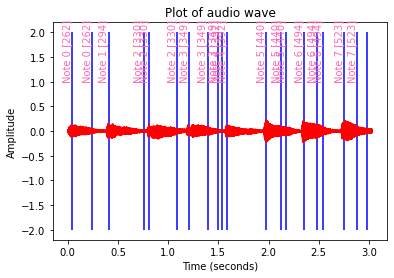

In [60]:
print(path)
sample_rate, data = wav.read(link)
audio_duration = len(data)/sample_rate
time_samples = np.linspace(0, audio_duration, len(data))
helper.plot_audio(time_samples, data)

for i, time in enumerate(onset_times):
    plt.vlines(time , ymin=-
                       2, ymax=2, colors='blue', zorder=2)
    note = path[i][0]
    plt.text(time, 1, f'Note {note} {scale[note]}', color='#FF69B4', ha='right', va='bottom', rotation=90)


In [ ]:
def lml_table(sample_data, scale):
    for i, sample in enumerate(sample_data):
        for j in range(len(scale)):
            prob_matrix[j, i] = helper.stable_nlml(time_samples, sample, f=scale[j])
    return prob_matrix

prob_mat = lml_table(sample_data, scale)

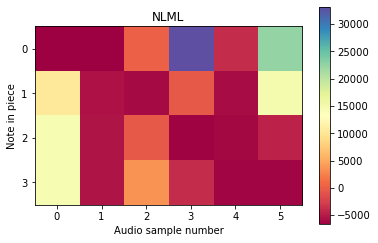

In [16]:
plt.imshow(prob_mat, cmap='Spectral', interpolation='nearest')
plt.title("NLML")
plt.colorbar()
plt.xlabel("Audio sample number")
plt.ylabel("Note in piece")
plt.yticks(range(len(prob_mat)))
plt.show()

In [17]:
print(prob_mat)

[[-6641.62772705 -6676.58125837   186.72302477 33156.84922748
  -3786.39894122 22443.81694993]
 [10455.07850761 -5572.921462   -6014.91598131  -406.43495516
  -5771.47186649 14935.46389152]
 [14375.19923678 -5330.91665192  -447.15618385 -6427.23487009
  -6132.09641231 -4354.08945841]
 [14464.86215519 -5332.09256669  3727.89786058 -3868.25721382
  -6262.02246184 -6228.59875011]]


In [20]:

def min_path(table):
    i, j = 0, 0
    path = [(i,j)]
    # While less than number of audio samples
    while i < table.shape[1]-2:
        minval = np.inf
        if table[i+1, j] < minval:
            minval = table[i+1, j]
            step = (i+1, j)
        if table[i+1, j+1] < minval:
            minval = table[i+1, j+1]
            step = (i+1, j+1)
        if table[i+1, j+2] < minval:
            minval = table[i+1, j+2]
            step = (i+1, j+2)
        path.append(step)
        i,j = step
    return np.array(path)

In [21]:
path = min_path(prob_mat)
print(path)

IndexError: index 4 is out of bounds for axis 0 with size 4